In [1]:
# Import packages and implement notebook settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(shuffle = True, random_state = 0)


pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)

%matplotlib inline 

sns.set_theme(style="darkgrid")


# Data Imports

In [2]:
import os

current_directory = os.getcwd()

dataframes = ['features.csv', 'features_dum_drop.csv', 'features_dum_nodrop.csv', 'features_encoded.csv',
              'response.csv',
              'X_train_drop.csv', 'X_test_drop.csv', 'y_train_drop.csv', 'y_test_drop.csv',
              'X_train_nodrop.csv', 'X_test_nodrop.csv', 'y_train_nodrop.csv', 'y_test_nodrop.csv',
              'X_train_encoded.csv', 'X_test_encoded.csv', 'y_train_encoded.csv', 'y_test_encoded.csv',
              'X_train_drop_scaled.csv', 'X_test_drop_scaled.csv',
              'X_train_nodrop_scaled.csv', 'X_test_nodrop_scaled.csv']

loaded_dataframes = {}

for file_name in dataframes:
    
    df_name = file_name.split('.csv')[0]
    file_path = os.path.join(current_directory, file_name)
    loaded_dataframes[df_name] = pd.read_csv(file_path, sep='\t')



In [3]:
features = loaded_dataframes['features']
features_dum_drop = loaded_dataframes['features_dum_drop']
features_dum_nodrop = loaded_dataframes['features_dum_nodrop']
features_encoded = loaded_dataframes['features_encoded']

response = loaded_dataframes['response']


X_train_drop = loaded_dataframes['X_train_drop']
X_test_drop= loaded_dataframes['X_test_drop']
y_train_drop = loaded_dataframes['y_train_drop']['SalePrice']
y_test_drop = loaded_dataframes['y_test_drop']['SalePrice']

X_train_encoded = loaded_dataframes['X_train_encoded']
X_test_encoded = loaded_dataframes['X_test_encoded']
y_train_encoded = loaded_dataframes['y_train_encoded']['SalePrice']
y_test_encoded = loaded_dataframes['y_test_encoded']['SalePrice']

# Gradient Boosting


## Gradient Boosting - Dummification - Base Model

In [4]:
from sklearn.ensemble import GradientBoostingRegressor

gbmr = GradientBoostingRegressor(random_state = 0)

gbmr.fit(X = X_train_drop,y = np.log(y_train_drop))

print('Best train score: ' + str(gbmr.score(X = X_train_drop,y = np.log(y_train_drop))))
print('Best test score: ' + str(gbmr.score(X = X_test_drop,y = np.log(y_test_drop))))



Best train score: 0.9590271909078666
Best test score: 0.9230324508219493


In [5]:
gbmr_drop_train_test_score = pd.DataFrame({'Model': ['Gradient Boosting_Drop'],
              'Train Score': [gbmr.score(X = X_train_drop,y = np.log(y_train_drop))],
              'Test Score': [gbmr.score(X = X_test_drop,y = np.log(y_test_drop))]
             })
gbmr_drop_train_test_score

,Model,Train Score,Test Score
0,Gradient Boosting_Drop,0.959027,0.923032


<Axes: xlabel='Feature', ylabel='Importance'>

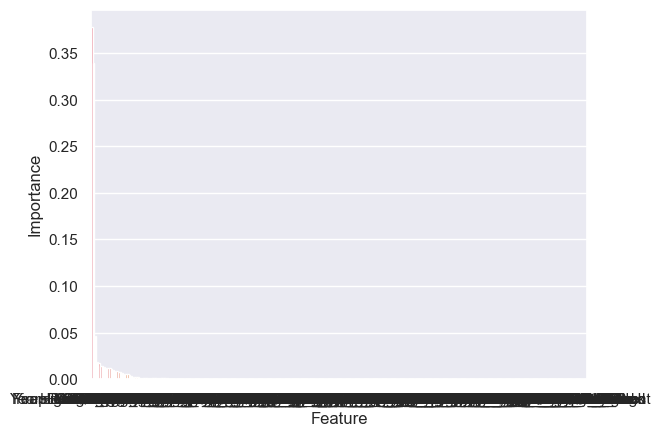

In [6]:
gbmr_drop_feature_importances = pd.Series(gbmr.feature_importances_, index=X_train_drop.columns).sort_values(ascending=False)


sns.barplot(data = pd.DataFrame(data = pd.DataFrame(data = gbmr_drop_feature_importances,  columns = [ 'Importance']).reset_index().rename(columns = {'index': 'Feature'})), y = 'Importance', x = 'Feature')



In [7]:
def list_intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [8]:
cat_signif_feat_list_gbmr_drop = []

for feat in gbmr_drop_feature_importances.index:
    if "_" in feat:
        cat_signif_feat_list_gbmr_drop.append(feat.split('_')[0])


cat_features_col = features.select_dtypes(include=['object']).columns

cat_signif_feat_list_gbmr_drop = list(set(list_intersection(cat_signif_feat_list_gbmr_drop, cat_features_col)))
cat_signif_feat_list_gbmr_drop

['BsmtQual',
 'RoofMatl',
 'LotConfig',
 'MSZoning',
 'BldgType',
 'Condition2',
 'CentralAir',
 'BsmtFinType2',
 'Exterior1st',
 'Condition1',
 'Foundation',
 'PoolQC',
 'KitchenQual',
 'Electrical',
 'BsmtCond',
 'GarageCond',
 'Fence',
 'SaleCondition',
 'GarageType',
 'LotShape',
 'LandContour',
 'GarageFinish',
 'Neighborhood',
 'HeatingQC',
 'Heating',
 'BsmtExposure',
 'Exterior2nd',
 'MiscFeature',
 'HouseStyle',
 'Street',
 'ExterQual',
 'Alley',
 'LandSlope',
 'Functional',
 'PavedDrive',
 'SaleType',
 'BsmtFinType1',
 'GarageQual',
 'ExterCond',
 'FireplaceQu',
 'Utilities',
 'MasVnrType',
 'RoofStyle']

Text(0, 0.5, 'Actual SalePrice')

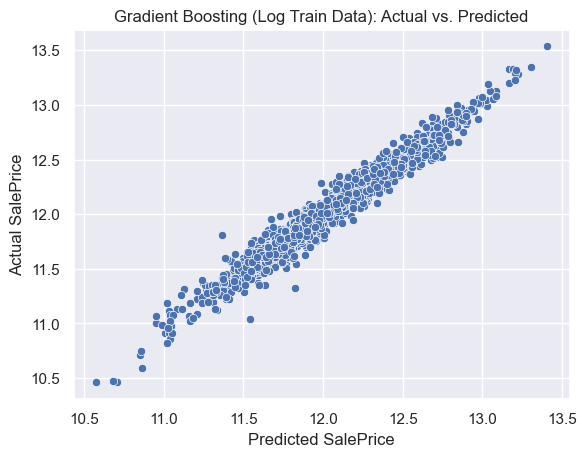

In [9]:
sns.scatterplot(x = gbmr.predict(X_train_drop), y = np.log(y_train_drop))
plt.title('Gradient Boosting (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

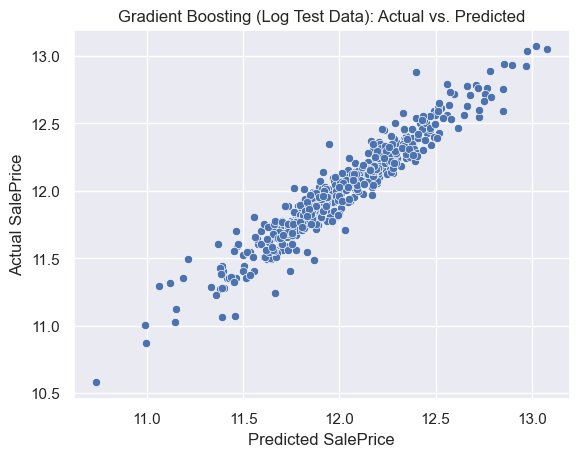

In [10]:
sns.scatterplot(x = gbmr.predict(X_test_drop), y = np.log(y_test_drop))
plt.title('Gradient Boosting (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Gradient Boosting - Dummification - Cross Validation

In [11]:

gbmr = GradientBoostingRegressor(random_state = 0)

gbmr_drop_cv = cross_val_score(estimator = gbmr, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'r2')


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [12]:

print('Mean cross-validation score: ' + str(gbmr_drop_cv.mean()))
print('Std dev cross-validation score: ' + str(gbmr_drop_cv.std()))

Mean cross-validation score: 0.9151920942654274
Std dev cross-validation score: 0.012292298827927197


## Gradient Boosting - Dummification - Hyperparameter Tuning


In [13]:
from sklearn.model_selection import GridSearchCV

gbmr = GradientBoostingRegressor(random_state = 0)

param = {'learning_rate': [0.033, 0.067, 0.1, 0.133, 0.167], 'subsample': [0.3, 0.6, 1],'n_estimators': [40, 50, 60]}

gsCV = GridSearchCV(gbmr, param, cv = kf, return_train_score = True)
gsCV.fit(X_train_drop, np.log(y_train_drop))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.033, 0.067, 0.1, 0.133, 0.167],
                         'n_estimators': [40, 50, 60],
                         'subsample': [0.3, 0.6, 1]},
             return_train_score=True)

In [14]:
gsCV_gbmr_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_gbmr_train_vs_test_df['model_number'] = gsCV_gbmr_train_vs_test_df['model_number'] + 1
gsCV_gbmr_train_vs_test_df['score_difference'] = gsCV_gbmr_train_vs_test_df['train_score'] - gsCV_gbmr_train_vs_test_df['test_score']

gsCV_gbmr_train_vs_test_df = gsCV_gbmr_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_gbmr_train_vs_test_df


,model_number,score_difference,score_type,score
0,1,0.019107,train_score,0.791356
1,2,0.019573,train_score,0.789464
2,3,0.019972,train_score,0.787246
3,4,0.021157,train_score,0.838253
4,5,0.022026,train_score,0.836655
5,6,0.022407,train_score,0.834828
6,7,0.023023,train_score,0.869276
7,8,0.023804,train_score,0.867683
8,9,0.025252,train_score,0.865646
9,10,0.026429,train_score,0.903006


<Axes: xlabel='model_number', ylabel='score'>

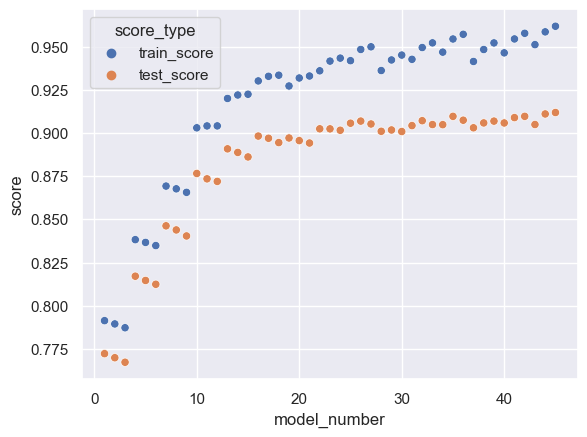

In [15]:
sns.scatterplot(data = gsCV_gbmr_train_vs_test_df.loc[gsCV_gbmr_train_vs_test_df['score'] > 0,:], y = 'score', x = 'model_number', hue = 'score_type')

In [16]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.9118606893288526
Best parameters: {'learning_rate': 0.167, 'n_estimators': 60, 'subsample': 1}


In [41]:
gbmr.set_params(learning_rate = 0.167, subsample = 1, n_estimators = 60)
gbmr.fit(X = X_train_drop,y = np.log(y_train_drop))
print('Best train score: ' + str(gbmr.score(X = X_train_drop,y = np.log(y_train_drop))))
print('Best test score: ' + str(gbmr.score(X = X_test_drop,y = np.log(y_test_drop))))


Best train score: 0.9579727217650333
Best test score: 0.9210632695520746


In [42]:
gbmr_drop_tuned_train_test_score = pd.DataFrame({'Model': ['Gradient Boosting_Drop_Tuned'],
              'Train Score': [gbmr.score(X = X_train_drop,y = np.log(y_train_drop))],
              'Test Score': [gbmr.score(X = X_test_drop,y = np.log(y_test_drop))]
             })
gbmr_drop_tuned_train_test_score

,Model,Train Score,Test Score
0,Gradient Boosting_Drop_Tuned,0.957973,0.921063


## Gradient Boosting - Dummification - Post Tuning - Cross Validation


In [43]:

gbmr = GradientBoostingRegressor(random_state = 0, learning_rate = 0.167, subsample = 1, n_estimators = 60)

gbmr_drop_cv_tuned = cross_val_score(estimator = gbmr, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'r2')


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [44]:

print('Mean cross-validation score: ' + str(gbmr_drop_cv_tuned.mean()))
print('Std dev cross-validation score: ' + str(gbmr_drop_cv_tuned.std()))

Mean cross-validation score: 0.9107181202049082
Std dev cross-validation score: 0.01497124715495599


## Gradient Boosting - Encoded - Base Model

In [21]:

gbmr = GradientBoostingRegressor(random_state = 0)
gbmr.fit(X = X_train_encoded,y = np.log(y_train_encoded))
print('Best train score: ' + str(gbmr.score(X = X_train_encoded,y = np.log(y_train_encoded))))
print('Best test score: ' + str(gbmr.score(X = X_test_encoded,y = np.log(y_test_encoded))))


Best train score: 0.9576939950648885
Best test score: 0.921996200169956


In [22]:
gbmr_encoded_train_test_score = pd.DataFrame({'Model': ['Gradient Boosting_Encoded'],
              'Train Score': [gbmr.score(X = X_train_encoded,y = np.log(y_train_encoded))],
              'Test Score': [gbmr.score(X = X_test_encoded,y = np.log(y_test_encoded))]
             })
gbmr_encoded_train_test_score

,Model,Train Score,Test Score
0,Gradient Boosting_Encoded,0.957694,0.921996


<Axes: xlabel='Feature', ylabel='Importance'>

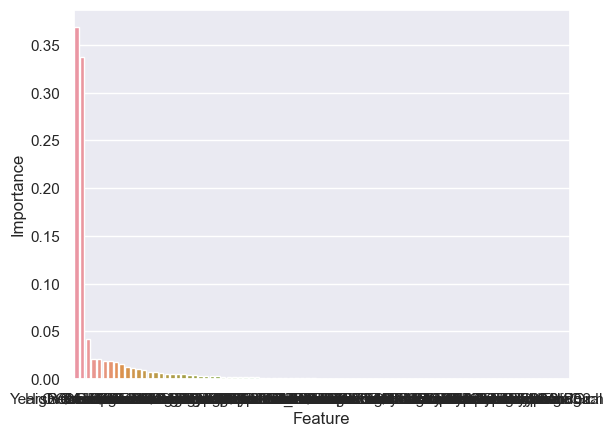

In [23]:
gbmr_encoded_feature_importances = pd.Series(gbmr.feature_importances_, index=X_train_encoded.columns).sort_values(ascending=False)
gbmr_encoded_feature_importances = pd.DataFrame(data = gbmr_encoded_feature_importances,  columns = [ 'Importance']).reset_index().rename(columns = {'index': 'Feature'})

sns.barplot(data = gbmr_encoded_feature_importances, y = 'Importance', x = 'Feature')


[Text(0, 0, 'HighQualFinSF'),
 Text(1, 0, 'OverallQual'),
 Text(2, 0, 'TotalSF'),
 Text(3, 0, 'GrLivArea'),
 Text(4, 0, 'YearsBetweenBuildvsSold'),
 Text(5, 0, 'OverallCond'),
 Text(6, 0, 'Fireplaces'),
 Text(7, 0, 'GarageCars'),
 Text(8, 0, 'YearRemodAdd'),
 Text(9, 0, 'CentralAir'),
 Text(10, 0, 'KitchenQual'),
 Text(11, 0, 'LotArea'),
 Text(12, 0, 'TotalFullBath'),
 Text(13, 0, 'YearsBetweenRemodvsSold'),
 Text(14, 0, 'BsmtFinSF1'),
 Text(15, 0, 'YearBuilt'),
 Text(16, 0, 'MSZoning'),
 Text(17, 0, 'GarageArea'),
 Text(18, 0, 'GarageType'),
 Text(19, 0, 'GarageCond'),
 Text(20, 0, 'BsmtFinSF'),
 Text(21, 0, 'GarageYrBlt'),
 Text(22, 0, '2ndFlrSF'),
 Text(23, 0, 'HeatingQC'),
 Text(24, 0, 'BsmtQual'),
 Text(25, 0, 'BsmtExposure'),
 Text(26, 0, 'BsmtFinType1'),
 Text(27, 0, 'PavedDrive'),
 Text(28, 0, 'SaleCondition'),
 Text(29, 0, '1stFlrSF'),
 Text(30, 0, 'Neighborhood'),
 Text(31, 0, 'Condition1'),
 Text(32, 0, 'BsmtUnfSF'),
 Text(33, 0, 'MSSubClass'),
 Text(34, 0, 'Functional'),
 T

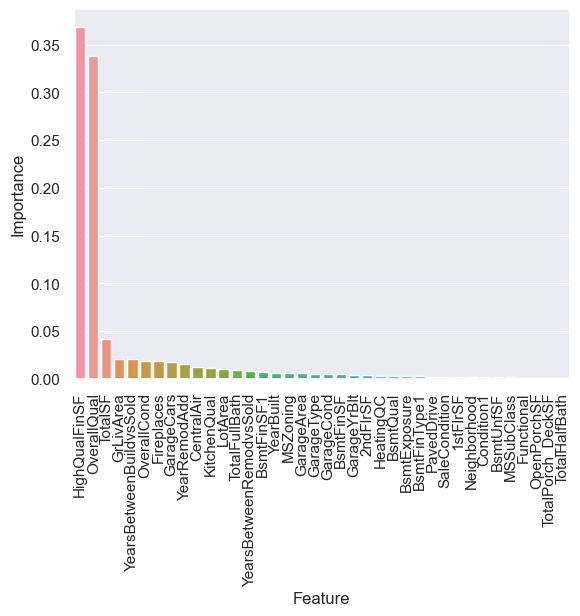

In [24]:

plot = sns.barplot(data = gbmr_encoded_feature_importances.loc[gbmr_encoded_feature_importances['Importance'] > 0.001, :], y = 'Importance', x = 'Feature')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)



[Text(0, 0, 'CentralAir'),
 Text(1, 0, 'KitchenQual'),
 Text(2, 0, 'MSZoning'),
 Text(3, 0, 'GarageType'),
 Text(4, 0, 'GarageCond'),
 Text(5, 0, 'HeatingQC'),
 Text(6, 0, 'BsmtQual'),
 Text(7, 0, 'BsmtExposure'),
 Text(8, 0, 'BsmtFinType1'),
 Text(9, 0, 'PavedDrive'),
 Text(10, 0, 'SaleCondition'),
 Text(11, 0, 'Neighborhood'),
 Text(12, 0, 'Condition1'),
 Text(13, 0, 'Functional'),
 Text(14, 0, 'ExterQual'),
 Text(15, 0, 'FireplaceQu'),
 Text(16, 0, 'Exterior1st'),
 Text(17, 0, 'Fence'),
 Text(18, 0, 'Exterior2nd'),
 Text(19, 0, 'Alley')]

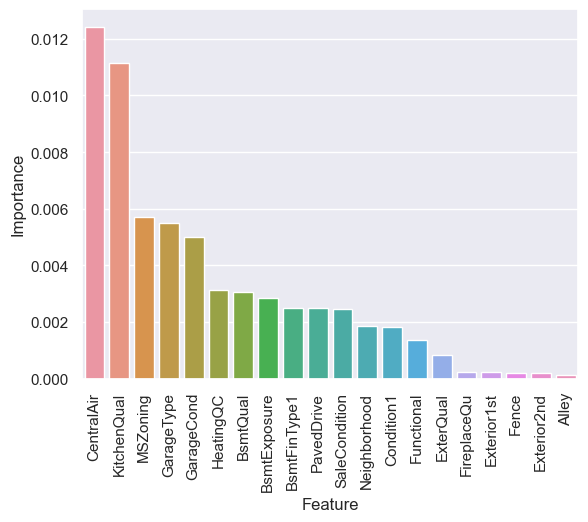

In [25]:

cat_features_col = features.select_dtypes(include=['object']).columns


plot = sns.barplot(data = gbmr_encoded_feature_importances.loc[(gbmr_encoded_feature_importances['Importance'] > 0.0001) & (gbmr_encoded_feature_importances['Feature'].isin(list_intersection(list(gbmr_encoded_feature_importances['Feature']),cat_features_col))), :], y = 'Importance', x = 'Feature')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)




Text(0, 0.5, 'Actual SalePrice')

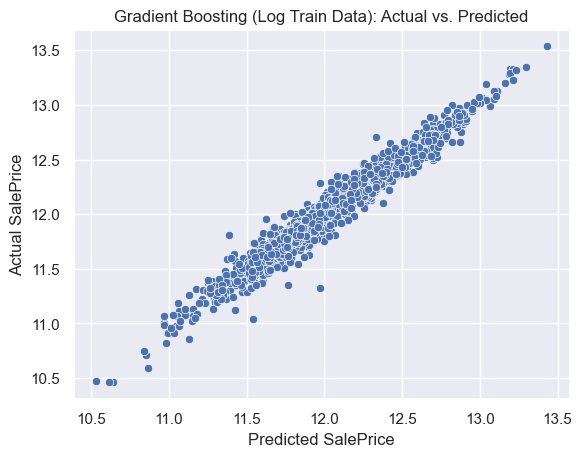

In [26]:
sns.scatterplot(x = gbmr.predict(X_train_encoded), y = np.log(y_train_encoded))
plt.title('Gradient Boosting (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

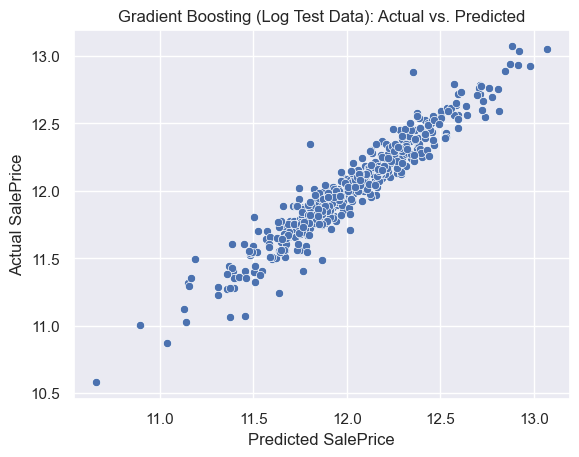

In [27]:
sns.scatterplot(x = gbmr.predict(X_test_encoded), y = np.log(y_test_encoded))
plt.title('Gradient Boosting (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Gradient Boosting - Encoded - Cross Validations

In [28]:

gbmr = GradientBoostingRegressor(random_state = 0)

gbmr_encoded_cv = cross_val_score(estimator = gbmr, X = features_encoded, y = np.log(response), cv = kf, scoring = 'r2')


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [29]:

print('Mean cross-validation score: ' + str(gbmr_encoded_cv.mean()))
print('Std dev cross-validation score: ' + str(gbmr_encoded_cv.std()))

Mean cross-validation score: 0.9147932448513822
Std dev cross-validation score: 0.01117411170359438


## Gradient Boosting - Encoded - Hyperparameter Tuning

In [30]:
gbmr = GradientBoostingRegressor(random_state = 0)

param = {'learning_rate': [0.033, 0.067, 0.1, 0.133, 0.167], 'subsample': [0.3, 0.6, 1],'n_estimators': [40, 50, 60]}

gsCV = GridSearchCV(gbmr, param, cv = kf, return_train_score = True)
gsCV.fit(X_train_encoded, np.log(y_train_encoded))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.033, 0.067, 0.1, 0.133, 0.167],
                         'n_estimators': [40, 50, 60],
                         'subsample': [0.3, 0.6, 1]},
             return_train_score=True)

In [31]:
gsCV_gbmr_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_gbmr_train_vs_test_df['model_number'] = gsCV_gbmr_train_vs_test_df['model_number'] + 1
gsCV_gbmr_train_vs_test_df['score_difference'] = gsCV_gbmr_train_vs_test_df['train_score'] - gsCV_gbmr_train_vs_test_df['test_score']

gsCV_gbmr_train_vs_test_df = gsCV_gbmr_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_gbmr_train_vs_test_df


,model_number,score_difference,score_type,score
0,1,0.017241,train_score,0.791820
1,2,0.019128,train_score,0.790259
2,3,0.020470,train_score,0.787783
3,4,0.019639,train_score,0.838214
4,5,0.021947,train_score,0.837395
5,6,0.023459,train_score,0.835018
6,7,0.021614,train_score,0.868869
7,8,0.024400,train_score,0.868014
8,9,0.026742,train_score,0.865755
9,10,0.027122,train_score,0.904264


<Axes: xlabel='model_number', ylabel='score'>

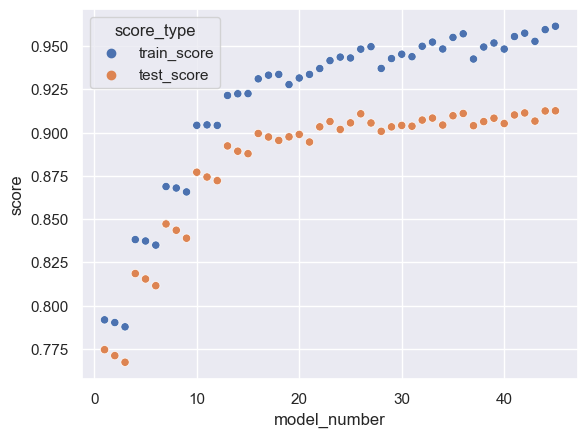

In [32]:
sns.scatterplot(data = gsCV_gbmr_train_vs_test_df.loc[gsCV_gbmr_train_vs_test_df['score'] > 0,:], y = 'score', x = 'model_number', hue = 'score_type')

In [33]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.912646222219886
Best parameters: {'learning_rate': 0.167, 'n_estimators': 60, 'subsample': 1}


In [45]:
gbmr.set_params(learning_rate = 0.167, subsample = 1, n_estimators = 60)
gbmr.fit(X = X_train_encoded,y = np.log(y_train_encoded))
print('Best train score: ' + str(gbmr.score(X = X_train_encoded,y = np.log(y_train_encoded))))
print('Best test score: ' + str(gbmr.score(X = X_test_encoded,y = np.log(y_test_encoded))))


Best train score: 0.9576622817547222
Best test score: 0.9170643710751327


In [46]:
gbmr_encoded_tuned_train_test_score = pd.DataFrame({'Model': ['Gradient Boosting_Encoded_Tuned'],
              'Train Score': [gbmr.score(X = X_train_encoded,y = np.log(y_train_encoded))],
              'Test Score': [gbmr.score(X = X_test_encoded,y = np.log(y_test_encoded))]
             })
gbmr_encoded_tuned_train_test_score

,Model,Train Score,Test Score
0,Gradient Boosting_Encoded_Tuned,0.957662,0.917064


## Gradient Boosting - Encoded - Post Tuning - Cross Validations

In [47]:

gbmr = GradientBoostingRegressor(random_state = 0, learning_rate = 0.167, subsample = 1, n_estimators = 60)

gbmr_encoded_cv_tuned = cross_val_score(estimator = gbmr, X = features_encoded, y = np.log(response), cv = kf, scoring = 'r2')


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [48]:

print('Mean cross-validation score: ' + str(gbmr_encoded_cv_tuned.mean()))
print('Std dev cross-validation score: ' + str(gbmr_encoded_cv_tuned.std()))

Mean cross-validation score: 0.910987666726097
Std dev cross-validation score: 0.013134891901741837


# Model Results Export

In [49]:
gbmr_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                      'Gradient Boosting_Drop': gbmr_drop_cv,
                                      'Gradient Boosting_Drop_Tuned': gbmr_drop_cv_tuned,
                                      'Gradient Boosting_Encoded': gbmr_encoded_cv,
                                      'Gradient Boosting_Encoded_Tuned': gbmr_encoded_cv_tuned
                                     }
                             )

gbmr_results

,Model Number,Gradient Boosting_Drop,Gradient Boosting_Drop_Tuned,Gradient Boosting_Encoded,Gradient Boosting_Encoded_Tuned
0,1.0,0.923174,0.921063,0.922170,0.917064
1,2.0,0.903558,0.889876,0.902580,0.897425
2,3.0,0.928869,0.929295,0.928917,0.928729
3,4.0,0.922811,0.916717,0.919587,0.917574
4,5.0,0.897548,0.896639,0.900712,0.894146


In [50]:
gbmr_train_test_score = pd.concat([gbmr_drop_train_test_score,
           gbmr_drop_tuned_train_test_score,
           gbmr_encoded_train_test_score,
           gbmr_encoded_tuned_train_test_score
          ])
gbmr_train_test_score

,Model,Train Score,Test Score
0,Gradient Boosting_Drop,0.959027,0.923032
0,Gradient Boosting_Drop_Tuned,0.957973,0.921063
0,Gradient Boosting_Encoded,0.957694,0.921996
0,Gradient Boosting_Encoded_Tuned,0.957662,0.917064


In [51]:

current_directory = os.getcwd()

dataframes = {'gbmr_results': gbmr_results,
             'gbmr_train_test_score': gbmr_train_test_score
             }


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    df.to_csv(file_path, sep='\t', index=False)